### Import Libraries

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import clean_review as cr
import seaborn as sns
import random
import time
from IPython.display import Markdown, display
import math

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Nutan Hotwani/nltk_data'
    - 'C:\\Users\\Nutan Hotwani\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Nutan Hotwani\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Nutan Hotwani\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Nutan Hotwani\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
plt.style.use('seaborn')

In [5]:
def printmd(string):
    display(Markdown(string))

### Load Dataset

In [6]:
dataset=[]
with open('Software.json',encoding='utf-8') as read_file:
    for line in read_file:
        dataset.append(json.loads(line))
    read_file.close()

#random.shuffle(dataset)
    
dataset=pd.DataFrame(dataset)
dataset.head(n=5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 12 columns):
overall           459436 non-null float64
verified          459436 non-null bool
reviewTime        459436 non-null object
reviewerID        459436 non-null object
asin              459436 non-null object
style             234401 non-null object
reviewerName      459412 non-null object
reviewText        459370 non-null object
summary           459380 non-null object
unixReviewTime    459436 non-null int64
vote              127853 non-null object
image             1508 non-null object
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 39.0+ MB


In [8]:
metadata=[]
with open('meta_Software.json',encoding='utf-8') as read_file:
    for line in read_file:
        metadata.append(json.loads(line))
    read_file.close()
    
metadata=pd.DataFrame(metadata)
metadata.head()

,title,brand,rank,main_cat,asin,description,image,also_buy,price,feature,also_view,category,tech1,date,details,similar_item,tech2
0,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,HOLT. RINEHART AND WINSTON,"25,550inSoftware(",Software,0030672120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sing, Watch, & Learn Spanish (DVD + Guide): 16...",McGraw Hill,"15,792inSoftware(",Software,0071480935,"[, Latin rhythms that will get your kids singi...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Connect with LearnSmart Access Card for Microb...,McGraw-Hill Science/Engineering/Math,"16,900inSoftware(",Software,007329506X,[Connect is the only integrated learning syste...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LearnSmart Standalone Access Card for Prescott...,McGraw-Hill Education,"12,986inSoftware(",Software,0073513458,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anatomy & Physiology Revealed Student Access C...,McGraw-Hill Education,"14,861inSoftware(",Software,0073525758,[Anatomy & Physiology Revealed Cat is the ulti...,[https://images-na.ssl-images-amazon.com/image...,"[0323394612, 0323227937, 1118527488]",$4.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26815 entries, 0 to 26814
Data columns (total 17 columns):
title           26806 non-null object
brand           26160 non-null object
rank            24672 non-null object
main_cat        26740 non-null object
asin            26815 non-null object
description     23216 non-null object
image           11667 non-null object
also_buy        2655 non-null object
price           5319 non-null object
feature         17959 non-null object
also_view       6981 non-null object
category        24751 non-null object
tech1           286 non-null object
date            907 non-null object
details         22748 non-null object
similar_item    46 non-null object
tech2           4 non-null object
dtypes: object(17)
memory usage: 3.5+ MB


### Data Preprocessing / Data mining

In [10]:
# Remove unnecessary Columns

dataset=dataset.drop(['reviewerName', 'unixReviewTime', 'image','style'],axis=1)
metadata=metadata.drop(['image','also_buy','price','also_view','tech1','date','similar_item','tech2','details'],axis=1)

dataset.info(),metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 8 columns):
overall       459436 non-null float64
verified      459436 non-null bool
reviewTime    459436 non-null object
reviewerID    459436 non-null object
asin          459436 non-null object
reviewText    459370 non-null object
summary       459380 non-null object
vote          127853 non-null object
dtypes: bool(1), float64(1), object(6)
memory usage: 25.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26815 entries, 0 to 26814
Data columns (total 8 columns):
title          26806 non-null object
brand          26160 non-null object
rank           24672 non-null object
main_cat       26740 non-null object
asin           26815 non-null object
description    23216 non-null object
feature        17959 non-null object
category       24751 non-null object
dtypes: object(8)
memory usage: 1.6+ MB


(None, None)

In [11]:
for i in dataset.columns:
    dataset=dataset.fillna('-')

In [12]:
"""for i in range(len(dataset)):
    if type(dataset['style'][i]) == dict:
        dataset['style'][i] = list(dataset['style'][i].values())[0].strip()"""

"for i in range(len(dataset)):\n    if type(dataset['style'][i]) == dict:\n        dataset['style'][i] = list(dataset['style'][i].values())[0].strip()"

In [11]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,Material Great,-
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,Health,-
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,7
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,missing pages!!,3
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,Best study product out there!,-


In [12]:
metadata.head()

,title,brand,rank,main_cat,asin,description,feature,category
0,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,HOLT. RINEHART AND WINSTON,"25,550inSoftware(",Software,0030672120,NaN,NaN,NaN
1,"Sing, Watch, & Learn Spanish (DVD + Guide): 16...",McGraw Hill,"15,792inSoftware(",Software,0071480935,"[, Latin rhythms that will get your kids singi...",NaN,NaN
2,Connect with LearnSmart Access Card for Microb...,McGraw-Hill Science/Engineering/Math,"16,900inSoftware(",Software,007329506X,[Connect is the only integrated learning syste...,NaN,NaN
3,LearnSmart Standalone Access Card for Prescott...,McGraw-Hill Education,"12,986inSoftware(",Software,0073513458,NaN,NaN,NaN
4,Anatomy & Physiology Revealed Student Access C...,McGraw-Hill Education,"14,861inSoftware(",Software,0073525758,[Anatomy & Physiology Revealed Cat is the ulti...,NaN,NaN


In [13]:
product_dataset=pd.merge(dataset,metadata)[:150000]

In [14]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 15 columns):
overall        150000 non-null float64
verified       150000 non-null bool
reviewTime     150000 non-null object
reviewerID     150000 non-null object
asin           150000 non-null object
reviewText     150000 non-null object
summary        150000 non-null object
vote           150000 non-null object
title          150000 non-null object
brand          149459 non-null object
rank           143530 non-null object
main_cat       150000 non-null object
description    144836 non-null object
feature        120820 non-null object
category       145902 non-null object
dtypes: bool(1), float64(1), object(13)
memory usage: 17.3+ MB


In [15]:
product_dataset.head(n=20)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,brand,rank,main_cat,description,feature,category
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,Material Great,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,Health,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,7,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,missing pages!!,3,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
4,5.0,True,"12 20, 2015",AG0LTM6JLS4TP,0077613252,Very informative. Easy for studying.,Easy for studying,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
5,4.0,True,"08 3, 2015",A3F6HEY4QN62SO,0077613252,was for class. came in great shape,came in great,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
6,4.0,True,"07 19, 2015",A1BAHI123SAHOU,0077613252,"Fast shipping, products as described",Four Stars,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
7,3.0,False,"06 11, 2015",A3IS0YX0A8NCJL,0077613252,I wouldn't waste money on the book. I bought t...,I wouldn't waste money on the book,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
8,4.0,True,"03 12, 2015",A1E05DJ5HLMTEB,0077613252,Passed the class.,Four Stars,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN
9,5.0,False,"09 3, 2014",A3LBRDP2WADIR3,0077613252,great time shippn,Five Stars,-,Connect Personal Health with LearnSmart 1 Seme...,McGraw-Hill Humanities/Social Sciences/Languages,"15,675inSoftware(",Software,[The most reliable and widely used personal he...,NaN,NaN


## Data Analysis

#### Distribution of overall product ratings

In [16]:
def overall_rating(data):
    
    ratings=data['overall']
    
    rating_dict={}
    for i in range(len(ratings)):
        if ratings[i] not in rating_dict:
            rating_dict[ratings[i]]=1
        else:
            rating_dict[ratings[i]] +=1
            
    rating_dict={k: v for k, v in sorted(rating_dict.items(), key=lambda item: item[0])}
            
    return rating_dict

In [17]:
product_rating=overall_rating(product_dataset)

In [18]:
def plot_figure(data,title,xlabel,ylabel):
    fig, ax = plt.subplots()
    plt.title(title)

    y = list(data.values())
    x = list(data.keys())
   
    ax.bar(x, y,width=0.6,color=['blue','orange','green','red','purple'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

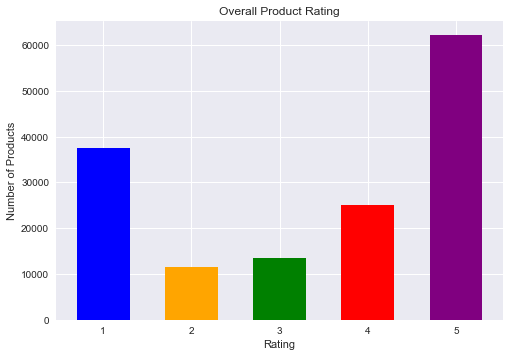

In [19]:
plot_figure(product_rating,'Overall Product Rating','Rating','Number of Products')

#### Trend of numbers of ratings across years

In [20]:
def year_analysis(data):
    
    date=[]
    for i in range(len(data)):
        temp = data['reviewTime'][i].split(', ')[-1]
        date.append(temp)
        
    time_dict={}
    for i in range(len(date)):
        if int(date[i]) not in time_dict:
            time_dict[int(date[i])] = 1
        else:
            time_dict[int(date[i])] += 1
            
    time_dict={k: v for k, v in sorted(time_dict.items(), key=lambda item: item[0])}
            
    return time_dict

In [21]:
year_product=year_analysis(product_dataset)

In [22]:
print(year_product)

{1999: 130, 2000: 1159, 2001: 3366, 2002: 5246, 2003: 6619, 2004: 6682, 2005: 8105, 2006: 8265, 2007: 12939, 2008: 16343, 2009: 18325, 2010: 12499, 2011: 7065, 2012: 5609, 2013: 10015, 2014: 9660, 2015: 8120, 2016: 5132, 2017: 3246, 2018: 1475}


In [23]:
def plot_figure(data,title,xlabel,ylabel):
    plt.title(title)

    y = list(data.values())
    x = list(data.keys())
    
    plt.xlim([1996,2019])
   
    plt.scatter(x,y,marker='+',c='red')
    plt.plot(x,y,c='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

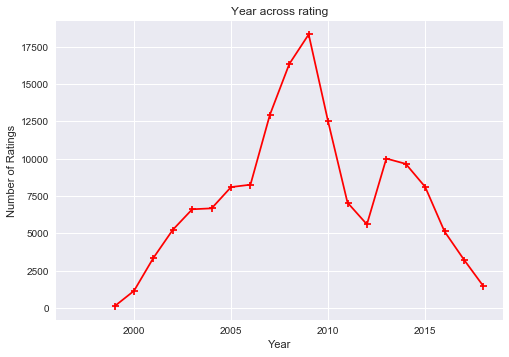

In [24]:
plot_figure(year_product,'Year across rating', 'Year','Number of Ratings')

#### Distribution of rating per months

In [25]:
def month_analysis(data):
    
    date=[]
    for i in range(len(data)):
        temp = (data['reviewTime'][i].split(', ')[0]).split()[0]
        date.append(temp)
        
    time_dict={}
    for i in range(len(date)):
        time_dict[int(date[i])] = 1
            
    time_dict={k: v for k, v in sorted(time_dict.items(), key=lambda item: item[0])}
    
    list_=[]
    for key in list(time_dict.keys()):
        temp={}
        temp[key]=time_dict[key]
        list_.append(temp)
        
    framed_data=pd.DataFrame(list_)
    
    return framed_data

In [26]:
framed_data=month_analysis(product_dataset)

In [27]:
framed_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


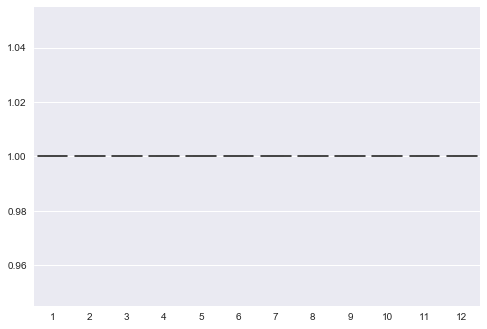

In [28]:
sns.boxplot(data=framed_data)

### User-Item Matrix

In [29]:
user_unique=list(product_dataset['reviewerID'].unique())
product_unique=list(product_dataset['asin'].unique())

In [30]:
user_item=np.ndarray((len(user_unique),len(product_unique)),dtype='float16')

print(user_item.shape)

(99852, 2541)


In [31]:
all_user=list(product_dataset['reviewerID'])
all_product=list(product_dataset['asin'])
all_rating=list(product_dataset['overall'])

start_time=time.time()
for i in range(len(all_user)):
    
    product=all_product[i]
    user=all_user[i]
    rating=all_rating[i]
    
    product_index=product_unique.index(product)
    user_index=user_unique.index(user)
    
    user_item[user_index][product_index]=rating
    
    if (i+1)%5000 == 0:
        
        finish_time=time.time()
        minute=(finish_time-start_time)/60
        sec=(finish_time-start_time)%60
        
        print(f'Complete Status: {i+1} | {len(all_user)} -----------> Time: {int(minute)} min {sec:{0}.{4}} sec')
        
        start_time=time.time()

Complete Status: 5000 | 150000 -----------> Time: 0 min 0.8491 sec
Complete Status: 10000 | 150000 -----------> Time: 0 min 3.782 sec
Complete Status: 15000 | 150000 -----------> Time: 0 min 3.148 sec
Complete Status: 20000 | 150000 -----------> Time: 0 min 2.773 sec
Complete Status: 25000 | 150000 -----------> Time: 0 min 3.93 sec
Complete Status: 30000 | 150000 -----------> Time: 0 min 4.696 sec
Complete Status: 35000 | 150000 -----------> Time: 0 min 5.666 sec
Complete Status: 40000 | 150000 -----------> Time: 0 min 6.57 sec
Complete Status: 45000 | 150000 -----------> Time: 0 min 7.519 sec
Complete Status: 50000 | 150000 -----------> Time: 0 min 9.047 sec
Complete Status: 55000 | 150000 -----------> Time: 0 min 9.264 sec
Complete Status: 60000 | 150000 -----------> Time: 0 min 12.02 sec
Complete Status: 65000 | 150000 -----------> Time: 0 min 11.99 sec
Complete Status: 70000 | 150000 -----------> Time: 0 min 13.72 sec
Complete Status: 75000 | 150000 -----------> Time: 0 min 15.22 s

In [32]:
print(f'\nUser-Item Mtrix::: Unique reviewer:{user_item.shape[0]}, Unique product:{user_item.shape[1]}\n\n')
print(user_item)


User-Item Mtrix::: Unique reviewer:99852, Unique product:2541


[[4. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 5.]]


In [33]:
# Sparseness of user-item matrix

matrix_details = np.unique(user_item,return_counts=True)

In [35]:
printmd('**Number of Reviews**')

printmd(f'**Empty review   ----   {matrix_details[0][0]}** : {matrix_details[1][0]}')
printmd(f'**1/5 review     ----   {matrix_details[0][1]}** : {matrix_details[1][1]}')
printmd(f'**2/5 review     ----   {matrix_details[0][2]}** : {matrix_details[1][2]}')
printmd(f'**3/5 review     ----   {matrix_details[0][3]}** : {matrix_details[1][3]}')
printmd(f'**4/5 review     ----   {matrix_details[0][4]}** : {matrix_details[1][4]}')

**Number of Reviews**

**Empty review   ----   0.0** : 253610110

**1/5 review     ----   1.0** : 28263

**2/5 review     ----   2.0** : 8755

**3/5 review     ----   3.0** : 10412

**4/5 review     ----   4.0** : 19426

In [36]:
sparseness = (matrix_details[1][0]/sum(matrix_details[1]))*100


printmd(f'**Sparseness of the User-Item matrix : {sparseness}**')

**Sparseness of the User-Item matrix : 99.9551394308362**

### Cosine Similarity

In [37]:
##Similarity matrix

sim_matrix = np.zeros((len(user_unique),len(user_unique)),dtype='float16')

In [38]:
sim_matrix.shape

(99852, 99852)

In [39]:
def similarity(user1,user2):
    
    idx_1 = user_unique.index(user1)
    idx_2 = user_unique.index(user2)
    
    #print(idx_1,idx_2)
    
    a = user_item[idx_1]
    b = user_item[idx_2]
    
    norma = a - np.mean(a)
    normb = b - np.mean(b)
    
    norm_a = np.square(norma)
    norm_b = np.square(normb)
    
    return sum(norma*normb)/(math.sqrt(sum(norm_a))*math.sqrt(sum(norm_b)))

In [40]:
for i in range(sim_matrix.shape[0]):
    
    user1 = user_unique[i]
    for j in range(sim_matrix.shape[0]):
        
        if i == j:
            sim_matrix[i][j] = 1.0
            continue
        else:
            user2 = user_unique[j]
            sim = similarity(user1,user2)
            sim_matrix[i][j] = sim
        
    if (i+1) == 1:
        
        print(f'Complete Status: {i+1} | {sim_matrix.shape[0]}')
        break

Complete Status: 1 | 99852


In [41]:
#ss=sorted(sim_matrix[0],reverse=True)

In [42]:
ss=np.unique(sim_matrix[0],return_counts=True)

In [43]:
best_sim=[]
for i in range(len(sim_matrix[0])):
    
    if sim_matrix[0][i] > 0.9 and len(best_sim)<15:
        best_sim.append((sim_matrix[0][i],i))
        
print(best_sim)

[(1.0, 0), (1.0, 1), (1.0, 2), (0.9995, 3), (0.9995, 4), (1.0, 5), (1.0, 6), (0.9995, 7), (1.0, 8), (0.9995, 9), (0.928, 10), (1.0, 11), (1.0, 12), (1.0, 13)]


In [44]:
products=[]
for i in range(len(best_sim)):
    match=best_sim[i]
    
    for j in range(len(user_item[i])):
        
        if user_item[i][j] > 0.0:
            product=all_product[i]
            products.append(product)

In [45]:
set(products)

{'0077613252'}